In [15]:
import numpy as np
from termcolor import colored
import matplotlib.pyplot as plt

###  Game implementation

In [16]:
np.random.seed(10)

In [36]:
np.random.seed(42)


class Game_Environment:             

    def __init__(self):
        np.random.seed(42)       
        self.rows = 15               # Setting the grid row to be 15
        self.columns = 15           # Setting the grid column to be 15
        self.initial_state = (0,0)      # Setting the initial state of agent to be left top
        self.destination_state = (self.rows-1,self.columns-1)   # Setting the destination state of agent to be right bottom
        self.costs = np.random.randint(1, 10, size = (self.rows, self.columns))     # a matrix to produce the cost in each grid cell
    
    actions = ['U', 'D', 'L', 'R']       # Storage of action function
    def step(self, state, action):      # Define the action steps in game grid
        row, column = state              # state shows the current row can column tuple 
        if action == 'U':               # Function for moving 1 step up
            new_row = row + 1                        # New row index after 1 step up 
            new_column = column                      # Column index stay same after up action
        elif action == 'D':              # Function for moving 1 step down
            new_row = row - 1                        # New row index after 1 step down
            new_column = column                      # Column index stay same after down action
        elif action == 'L':             # Function for moving 1 step to left
            new_row = row                            # Row index stay same after left action
            new_column = column - 1                  # New row index after 1 step to left
        elif action == 'R':             # Function for moving 1 step to right
            new_row = row                            # Row index stay same after right action
            new_column = column + 1                   # New row index after 1 step to right
        else:
            assert False               # if the action taken out of grid, stop the action as agent move to outside of grid
        
        # Deinfe the False & True function to stop the action taken out of grid
        if (not(0 <= new_row < self.rows)) or (not(0 <= new_column < self.columns)):      # the range of the new row and column should within the size of grid
            return True, (row, column),self.costs[row][column]       # if the new cell is not in the range of grid, return the original cost
        else:
            return False, (new_row, new_column),self.costs[new_row][new_column]        # if the new cell within the grid, return the cost of new cell         

        
    def destination(self, state):              # Define the destination of the left bottom cell
        return state == self.destination_state   # Return the destination cell to the state 

    def get_costs(self, state):                     # Define the costs of each grid cell 
        row, column = state                    # Define the state by current row and column
        return self.costs[row][column]        # return the value to each state


    def Board(self):
        figure, axes = plt.subplots(figsize=(8,8))
        plt.axis('off')
        axes.matshow(self.costs, cmap=plt.cm.Blues)
        for i in range(self.rows):
            for j in range(self.columns):
                cost = self.costs[i,j]
                axes.text(i, j, str(cost), va='center', ha='center')


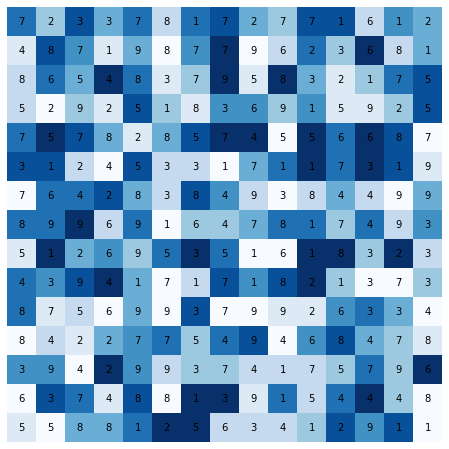

In [38]:
import warnings
warnings.filterwarnings("ignore")
game = Game_Environment()
game.Board()

In [3]:
def make_grid(x, y, n):
    return np.random.randint(0, n, (x, y))

In [4]:
scorings = ['relative', 'difference']
# directions = [(x, y) for x in (-1, 0 ,1) for y in (-1, 0, 1)]
directions = [(0,1), (0,-1), (1,0), (-1,0)]

class Game:
    def __init__(self, x, y, n, scoring, seed=10):
        np.random.seed(seed)
        self.width = y
        self.height = x
        self.game_state = {'grid': make_grid(x,y,n), 'score': 0, 'seen': np.zeros((x,y))}
        self.is_end = False
        self.agent_state = {'pos': (0,0), 'history':set()}
        assert scoring in scorings
        self.scoring = scoring
        
    def step(self, velocity):
        if self.is_end:
            return
        # make sure direction is valid
        assert velocity in directions
        grid = self.game_state['grid']
        x, y = self.agent_state['pos']
        pos_t = (x + velocity[0], y + velocity[1])
        # make sure new position is inside grid
        if (pos_t[0] >= self.height or pos_t[0] < 0) or (pos_t[1] >= self.width or pos_t[1] < 0):
            return
        else:
            # update position
            self.agent_state['history'].add((x,y))
            self.agent_state['pos'] = pos_t
            self.game_state['seen'][pos_t] = 1
            # update score
            if self.scoring == 'relative':
                self.game_state['score'] += grid[x, y]
            elif self.scoring == 'difference':
                self.game_state['score'] += (abs(grid[x, y] - grid[pos_t[0], pos_t[1]]))
            
            # self.show_path()
            if (pos_t == (self.height, self.width)):
                self.is_end = true      
                
    def get_neighbours(self):
        grid = self.game_state['grid']
        x, y = self.agent_state['pos']
        visited = self.game_state['seen']
        neighbours = dict()
        for pos in directions:
            x, y = self.agent_state['pos']
            x += pos[0]
            y += pos[1]
            if not ((x >= self.height or x < 0) or (y >= self.width or y < 0)) and pos != (0,0) and visited[x,y] == 0:
                neighbours[(x,y)] = grid[x][y]
        return neighbours
        
    def show_grid(self):
        print('GAME GRID')
        grid = self.game_state['grid']
        for i in range(grid.shape[0]):
            print('| ', end='')
            for j in range(grid.shape[1]):
                print(colored(grid[i, j],'red'), end=' | ')
            print('\n')
    
    def show_path(self):
        score = self.game_state['score']
        print(f'GAME GRID WITH PATH\nSCORE: {score}')
        grid = self.game_state['grid']
        path = self.agent_state['history']
        for i in range(grid.shape[0]):
            print('| ', end='')
            for j in range(grid.shape[1]):
                if ((i, j) in path):
                    print(colored(grid[i, j], 'green'), end=' | ')
                elif (i, j) == self.agent_state['pos']:
                    print(''+colored(grid[i,j], 'red')+colored('*', 'blue'),end='| ')
                else: 
                    print(colored(grid[i, j], 'red'), end=' | ')
            print('\n')

In [5]:
game =  Game(5,5,10, 'relative')
game.show_grid()
game.show_path()

GAME GRID
| 9 | 4 | 0 | 

| 1 | 9 | 0 | 

| 1 | 8 | 9 | 

GAME GRID WITH PATH
SCORE: 0
| 9*| 4 | 0 | 

| 1 | 9 | 0 | 

| 1 | 8 | 9 | 



In [6]:
game.step((0,1))
game.show_path()

GAME GRID WITH PATH
SCORE: 9
| 9 | 4*| 0 | 

| 1 | 9 | 0 | 

| 1 | 8 | 9 | 



In [7]:
game.step((0,1))
game.show_path()

GAME GRID WITH PATH
SCORE: 13
| 9 | 4 | 0*| 

| 1 | 9 | 0 | 

| 1 | 8 | 9 | 



# Heuristic algorithm

Reference: https://hackernoon.com/minimum-cost-path-analysis-python-47ad79a54519

In [8]:
game =  Game(5,5,10, 'relative')
game.show_path()
game.get_neighbours()

GAME GRID WITH PATH
SCORE: 0
| 9*| 4 | 0 | 

| 1 | 9 | 0 | 

| 1 | 8 | 9 | 



{(0, 1): 4, (1, 0): 1}

# Game Mode 2

In [24]:
game =  Game(5,5,10, 'relative')
n = 5
max_steps = 10
end = 5-1, 5-1
steps = 0
while (not game.is_end):
    steps += 1
    i, j = game.agent_state['pos']
    # first sort moves based on actual distance to end
    # 1. Find the n physically closest moves neighbours to the end
    grid = game.game_state['grid']
    visited = game.game_state['seen']
    neighbours = []
    # Our heuristics agent can only move down or to the right
    for pos in [(1,0),(0,1)]:
        x, y = game.agent_state['pos']
        x += pos[0]
        y += pos[1]
        if not ((x >= game.height or x < 0) or (y >= game.width or y < 0)) and pos != (0,0) and visited[x,y] == 0:
            neighbours.append((grid[x,y],pos[0],pos[1]))
    # 2. chose the move with the least score
    if len(neighbours) == 0:
        break
    best = sorted(neighbours, key=lambda x: x[0])[0]
    
    # 3. make the move
    game.step((best[1],best[2]))
    game.show_path()
    if (steps >= max_steps):
        break

GAME GRID WITH PATH
SCORE: 9
| 9 | 4 | 0 | 1 | 9 | 

| 0*| 1 | 8 | 9 | 0 | 

| 8 | 6 | 4 | 3 | 0 | 

| 4 | 6 | 8 | 1 | 8 | 

| 4 | 1 | 3 | 6 | 5 | 

GAME GRID WITH PATH
SCORE: 9
| 9 | 4 | 0 | 1 | 9 | 

| 0 | 1*| 8 | 9 | 0 | 

| 8 | 6 | 4 | 3 | 0 | 

| 4 | 6 | 8 | 1 | 8 | 

| 4 | 1 | 3 | 6 | 5 | 

GAME GRID WITH PATH
SCORE: 10
| 9 | 4 | 0 | 1 | 9 | 

| 0 | 1 | 8 | 9 | 0 | 

| 8 | 6*| 4 | 3 | 0 | 

| 4 | 6 | 8 | 1 | 8 | 

| 4 | 1 | 3 | 6 | 5 | 

GAME GRID WITH PATH
SCORE: 16
| 9 | 4 | 0 | 1 | 9 | 

| 0 | 1 | 8 | 9 | 0 | 

| 8 | 6 | 4*| 3 | 0 | 

| 4 | 6 | 8 | 1 | 8 | 

| 4 | 1 | 3 | 6 | 5 | 

GAME GRID WITH PATH
SCORE: 20
| 9 | 4 | 0 | 1 | 9 | 

| 0 | 1 | 8 | 9 | 0 | 

| 8 | 6 | 4 | 3*| 0 | 

| 4 | 6 | 8 | 1 | 8 | 

| 4 | 1 | 3 | 6 | 5 | 

GAME GRID WITH PATH
SCORE: 23
| 9 | 4 | 0 | 1 | 9 | 

| 0 | 1 | 8 | 9 | 0 | 

| 8 | 6 | 4 | 3 | 0*| 

| 4 | 6 | 8 | 1 | 8 | 

| 4 | 1 | 3 | 6 | 5 | 

GAME GRID WITH PATH
SCORE: 23
| 9 | 4 | 0 | 1 | 9 | 

| 0 | 1 | 8 | 9 | 0 | 

| 8 | 6 | 4 | 3 | 0 | 



# Influence of Grid Size

In [26]:
game =  Game(10,10,10, 'relative')
n = 10
max_steps = 20
end = 10-1, 10-1
steps = 0
while (not game.is_end):
    steps += 1
    i, j = game.agent_state['pos']
    # first sort moves based on actual distance to end
    # 1. Find the n physically closest moves neighbours to the end
    grid = game.game_state['grid']
    visited = game.game_state['seen']
    neighbours = []
    # Our heuristics agent can only move down or to the right
    for pos in [(1,0),(0,1)]:
        x, y = game.agent_state['pos']
        x += pos[0]
        y += pos[1]
        if not ((x >= game.height or x < 0) or (y >= game.width or y < 0)) and pos != (0,0) and visited[x,y] == 0:
            neighbours.append((grid[x,y],pos[0],pos[1]))
    # 2. chose the move with the least score
    if len(neighbours) == 0:
        break
    best = sorted(neighbours, key=lambda x: x[0])[0]
    
    # 3. make the move
    game.step((best[1],best[2]))
    game.show_path()
    if (steps >= max_steps):
        break

GAME GRID WITH PATH
SCORE: 9
| 9 | 4*| 0 | 1 | 9 | 0 | 1 | 8 | 9 | 0 | 

| 8 | 6 | 4 | 3 | 0 | 4 | 6 | 8 | 1 | 8 | 

| 4 | 1 | 3 | 6 | 5 | 3 | 9 | 6 | 9 | 1 | 

| 9 | 4 | 2 | 6 | 7 | 8 | 8 | 9 | 2 | 0 | 

| 6 | 7 | 8 | 1 | 7 | 1 | 4 | 0 | 8 | 5 | 

| 4 | 7 | 8 | 8 | 2 | 6 | 2 | 8 | 8 | 6 | 

| 6 | 5 | 6 | 0 | 0 | 6 | 9 | 1 | 8 | 9 | 

| 1 | 2 | 8 | 9 | 9 | 5 | 0 | 2 | 7 | 3 | 

| 0 | 4 | 2 | 0 | 3 | 3 | 1 | 2 | 5 | 9 | 

| 0 | 1 | 0 | 1 | 9 | 0 | 9 | 2 | 1 | 1 | 

GAME GRID WITH PATH
SCORE: 13
| 9 | 4 | 0*| 1 | 9 | 0 | 1 | 8 | 9 | 0 | 

| 8 | 6 | 4 | 3 | 0 | 4 | 6 | 8 | 1 | 8 | 

| 4 | 1 | 3 | 6 | 5 | 3 | 9 | 6 | 9 | 1 | 

| 9 | 4 | 2 | 6 | 7 | 8 | 8 | 9 | 2 | 0 | 

| 6 | 7 | 8 | 1 | 7 | 1 | 4 | 0 | 8 | 5 | 

| 4 | 7 | 8 | 8 | 2 | 6 | 2 | 8 | 8 | 6 | 

| 6 | 5 | 6 | 0 | 0 | 6 | 9 | 1 | 8 | 9 | 

| 1 | 2 | 8 | 9 | 9 | 5 | 0 | 2 | 7 | 3 | 

| 0 | 4 | 2 | 0 | 3 | 3 | 1 | 2 | 5 | 9 | 

| 0 | 1 | 0 | 1 | 9 | 0 | 9 | 2 | 1 | 1 | 

GAME GRID WITH PATH
SCORE: 13
| 9 | 4 | 0 | 1*| 9 | 0 | 1 | 8

| 0 | 4 | 2 | 0 | 3 | 3 | 1 | 2 | 5 | 9 | 

| 0 | 1 | 0 | 1 | 9 | 0 | 9 | 2 | 1*| 1 | 

GAME GRID WITH PATH
SCORE: 53
| 9 | 4 | 0 | 1 | 9 | 0 | 1 | 8 | 9 | 0 | 

| 8 | 6 | 4 | 3 | 0 | 4 | 6 | 8 | 1 | 8 | 

| 4 | 1 | 3 | 6 | 5 | 3 | 9 | 6 | 9 | 1 | 

| 9 | 4 | 2 | 6 | 7 | 8 | 8 | 9 | 2 | 0 | 

| 6 | 7 | 8 | 1 | 7 | 1 | 4 | 0 | 8 | 5 | 

| 4 | 7 | 8 | 8 | 2 | 6 | 2 | 8 | 8 | 6 | 

| 6 | 5 | 6 | 0 | 0 | 6 | 9 | 1 | 8 | 9 | 

| 1 | 2 | 8 | 9 | 9 | 5 | 0 | 2 | 7 | 3 | 

| 0 | 4 | 2 | 0 | 3 | 3 | 1 | 2 | 5 | 9 | 

| 0 | 1 | 0 | 1 | 9 | 0 | 9 | 2 | 1 | 1*| 



# Influence of Cell Number

In [39]:
game =  Game(10,10,100, 'relative')
n = 10
max_steps = 20
end = 10-1, 10-1
steps = 0
while (not game.is_end):
    steps += 1
    i, j = game.agent_state['pos']
    # first sort moves based on actual distance to end
    # 1. Find the n physically closest moves neighbours to the end
    grid = game.game_state['grid']
    visited = game.game_state['seen']
    neighbours = []
    # Our heuristics agent can only move down or to the right
    for pos in [(1,0),(0,1)]:
        x, y = game.agent_state['pos']
        x += pos[0]
        y += pos[1]
        if not ((x >= game.height or x < 0) or (y >= game.width or y < 0)) and pos != (0,0) and visited[x,y] == 0:
            neighbours.append((grid[x,y],pos[0],pos[1]))
    # 2. chose the move with the least score
    if len(neighbours) == 0:
        break
    best = sorted(neighbours, key=lambda x: x[0])[0]
    
    # 3. make the move
    game.step((best[1],best[2]))
    game.show_path()
    if (steps >= max_steps):
        break

GAME GRID WITH PATH
SCORE: 9
| 9 | 15*| 64 | 28 | 89 | 93 | 29 | 8 | 73 | 0 | 

| 40 | 36 | 16 | 11 | 54 | 88 | 62 | 33 | 72 | 78 | 

| 49 | 51 | 54 | 77 | 69 | 13 | 25 | 13 | 92 | 86 | 

| 30 | 30 | 89 | 12 | 65 | 31 | 57 | 36 | 27 | 18 | 

| 93 | 77 | 22 | 23 | 94 | 11 | 28 | 74 | 88 | 9 | 

| 15 | 18 | 80 | 71 | 88 | 11 | 17 | 46 | 7 | 75 | 

| 28 | 33 | 84 | 96 | 88 | 44 | 5 | 4 | 71 | 88 | 

| 88 | 50 | 54 | 34 | 15 | 77 | 88 | 15 | 6 | 85 | 

| 22 | 11 | 12 | 92 | 96 | 62 | 57 | 79 | 42 | 57 | 

| 97 | 50 | 45 | 40 | 89 | 73 | 37 | 0 | 18 | 23 | 

GAME GRID WITH PATH
SCORE: 24
| 9 | 15 | 64 | 28 | 89 | 93 | 29 | 8 | 73 | 0 | 

| 40 | 36*| 16 | 11 | 54 | 88 | 62 | 33 | 72 | 78 | 

| 49 | 51 | 54 | 77 | 69 | 13 | 25 | 13 | 92 | 86 | 

| 30 | 30 | 89 | 12 | 65 | 31 | 57 | 36 | 27 | 18 | 

| 93 | 77 | 22 | 23 | 94 | 11 | 28 | 74 | 88 | 9 | 

| 15 | 18 | 80 | 71 | 88 | 11 | 17 | 46 | 7 | 75 | 

| 28 | 33 | 84 | 96 | 88 | 44 | 5 | 4 | 71 | 88 | 

| 88 | 50 | 54 | 34 | 15 | 77 | 88 | 15

| 93 | 77 | 22 | 23 | 94 | 11 | 28 | 74 | 88 | 9 | 

| 15 | 18 | 80 | 71 | 88 | 11 | 17 | 46 | 7 | 75 | 

| 28 | 33 | 84 | 96 | 88 | 44 | 5 | 4 | 71 | 88 | 

| 88 | 50 | 54 | 34 | 15 | 77 | 88 | 15 | 6 | 85 | 

| 22 | 11 | 12 | 92 | 96 | 62 | 57 | 79 | 42 | 57*| 

| 97 | 50 | 45 | 40 | 89 | 73 | 37 | 0 | 18 | 23 | 

GAME GRID WITH PATH
SCORE: 656
| 9 | 15 | 64 | 28 | 89 | 93 | 29 | 8 | 73 | 0 | 

| 40 | 36 | 16 | 11 | 54 | 88 | 62 | 33 | 72 | 78 | 

| 49 | 51 | 54 | 77 | 69 | 13 | 25 | 13 | 92 | 86 | 

| 30 | 30 | 89 | 12 | 65 | 31 | 57 | 36 | 27 | 18 | 

| 93 | 77 | 22 | 23 | 94 | 11 | 28 | 74 | 88 | 9 | 

| 15 | 18 | 80 | 71 | 88 | 11 | 17 | 46 | 7 | 75 | 

| 28 | 33 | 84 | 96 | 88 | 44 | 5 | 4 | 71 | 88 | 

| 88 | 50 | 54 | 34 | 15 | 77 | 88 | 15 | 6 | 85 | 

| 22 | 11 | 12 | 92 | 96 | 62 | 57 | 79 | 42 | 57 | 

| 97 | 50 | 45 | 40 | 89 | 73 | 37 | 0 | 18 | 23*| 



# Game Mode 1 

In [23]:
game =  Game(5,5,10, 'difference')
n = 5
max_steps = 10
end = 5-1, 5-1
steps = 0
while (not game.is_end):
    steps += 1
    i, j = game.agent_state['pos']
    # first sort moves based on actual distance to end
    # 1. Find the n physically closest moves neighbours to the end
    grid = game.game_state['grid']
    visited = game.game_state['seen']
    neighbours = []
    # Our heuristics agent can only move down or to the right
    for pos in [(1,0),(0,1)]:
        x, y = game.agent_state['pos']
        x += pos[0]
        y += pos[1]
        if not ((x >= game.height or x < 0) or (y >= game.width or y < 0)) and pos != (0,0) and visited[x,y] == 0:
            neighbours.append((grid[x,y],pos[0],pos[1]))
    # 2. chose the move with the least score
    if len(neighbours) == 0:
        break
    best = sorted(neighbours, key=lambda x: x[0])[0]
    
    # 3. make the move
    game.step((best[1],best[2]))
    game.show_path()
    if (steps >= max_steps):
        break

GAME GRID WITH PATH
SCORE: 9
| 9 | 4 | 0 | 1 | 9 | 

| 0*| 1 | 8 | 9 | 0 | 

| 8 | 6 | 4 | 3 | 0 | 

| 4 | 6 | 8 | 1 | 8 | 

| 4 | 1 | 3 | 6 | 5 | 

GAME GRID WITH PATH
SCORE: 10
| 9 | 4 | 0 | 1 | 9 | 

| 0 | 1*| 8 | 9 | 0 | 

| 8 | 6 | 4 | 3 | 0 | 

| 4 | 6 | 8 | 1 | 8 | 

| 4 | 1 | 3 | 6 | 5 | 

GAME GRID WITH PATH
SCORE: 15
| 9 | 4 | 0 | 1 | 9 | 

| 0 | 1 | 8 | 9 | 0 | 

| 8 | 6*| 4 | 3 | 0 | 

| 4 | 6 | 8 | 1 | 8 | 

| 4 | 1 | 3 | 6 | 5 | 

GAME GRID WITH PATH
SCORE: 17
| 9 | 4 | 0 | 1 | 9 | 

| 0 | 1 | 8 | 9 | 0 | 

| 8 | 6 | 4*| 3 | 0 | 

| 4 | 6 | 8 | 1 | 8 | 

| 4 | 1 | 3 | 6 | 5 | 

GAME GRID WITH PATH
SCORE: 18
| 9 | 4 | 0 | 1 | 9 | 

| 0 | 1 | 8 | 9 | 0 | 

| 8 | 6 | 4 | 3*| 0 | 

| 4 | 6 | 8 | 1 | 8 | 

| 4 | 1 | 3 | 6 | 5 | 

GAME GRID WITH PATH
SCORE: 21
| 9 | 4 | 0 | 1 | 9 | 

| 0 | 1 | 8 | 9 | 0 | 

| 8 | 6 | 4 | 3 | 0*| 

| 4 | 6 | 8 | 1 | 8 | 

| 4 | 1 | 3 | 6 | 5 | 

GAME GRID WITH PATH
SCORE: 29
| 9 | 4 | 0 | 1 | 9 | 

| 0 | 1 | 8 | 9 | 0 | 

| 8 | 6 | 4 | 3 | 0 | 


# Djikstras Algorithm 
# NOT WORKING !!!!!


In [ ]:
def dijkstra(env, verbose = True):
    container = [(0, StateNode(env, env.init_state, [], 0))]
    heapq.heapify(container)

    # dict: state --> path_cost
    visited = {env.init_state: env.costs[0,0]}
    n_expanded = 0
    while len(container) > 0:
        n_expanded += 1
        _, node = heapq.heappop(container)
        # check if this state is the goal
        if env.is_goal(node.state):
            print("last state")
            if verbose:
                print(f'Visited Nodes: {len(visited.keys())},\t\tExpanded Nodes: {n_expanded},\t\t'
                      f'Nodes in Container: {len(container)}')
                print(f'Cost of Path (with Costly Moves): {node.path_cost}')
            return node.actions
    
        # add unvisited (or visited at higher path cost) successors to container
        successors = node.get_successors()
        for s in successors:
            if s.state not in visited.keys() or s.path_cost < visited[s.state]:
                visited[s.state] = s.path_cost
                heapq.heappush(container, (s.path_cost, s))
    
    return None